# Business Sales Performance Analytics

## Client Context
This analysis was conducted for a small online retail business selling
consumer products across the UK and international markets.

The goal of the analysis is to:
- Understand sales performance over time
- Identify top-selling products
- Analyze regional revenue contribution
- Provide actionable business recommendations to improve revenue

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style="whitegrid")
print("Environment ready")

Environment ready


In [6]:
df = pd.read_csv("online_retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
 8   CustomeerID  530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.4+ MB


InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
CustomeerID         0
dtype: int64

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df[~df['InvoiceNo'].str.startswith('C', na=False)]
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df.shape

(530104, 9)

In [18]:
df = df.dropna(subset=['Description'])
df['CustomerID'] = df['CustomerID'].fillna(0)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
CustomeerID    0
dtype: int64

In [19]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df[['Quantity', 'UnitPrice', 'Revenue']].head()

,Quantity,UnitPrice,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


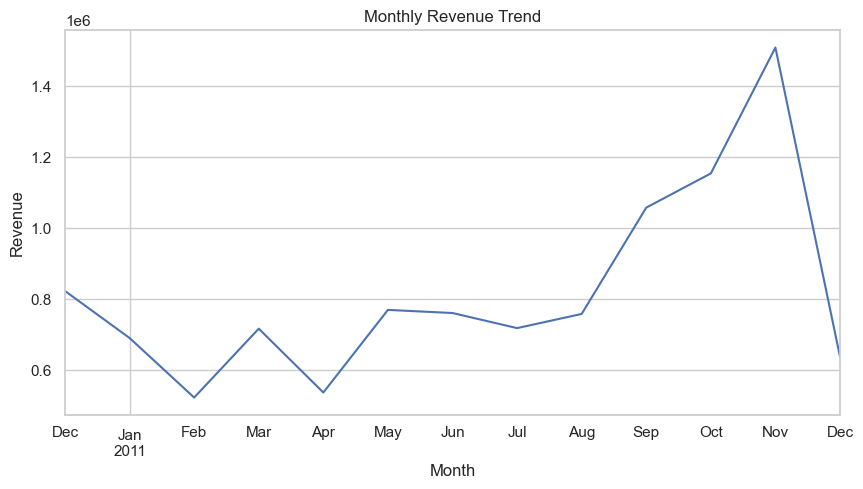

In [22]:
monthly_revenue = (
    df
    .set_index('InvoiceDate')
    .resample('ME')['Revenue']
    .sum()
)

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

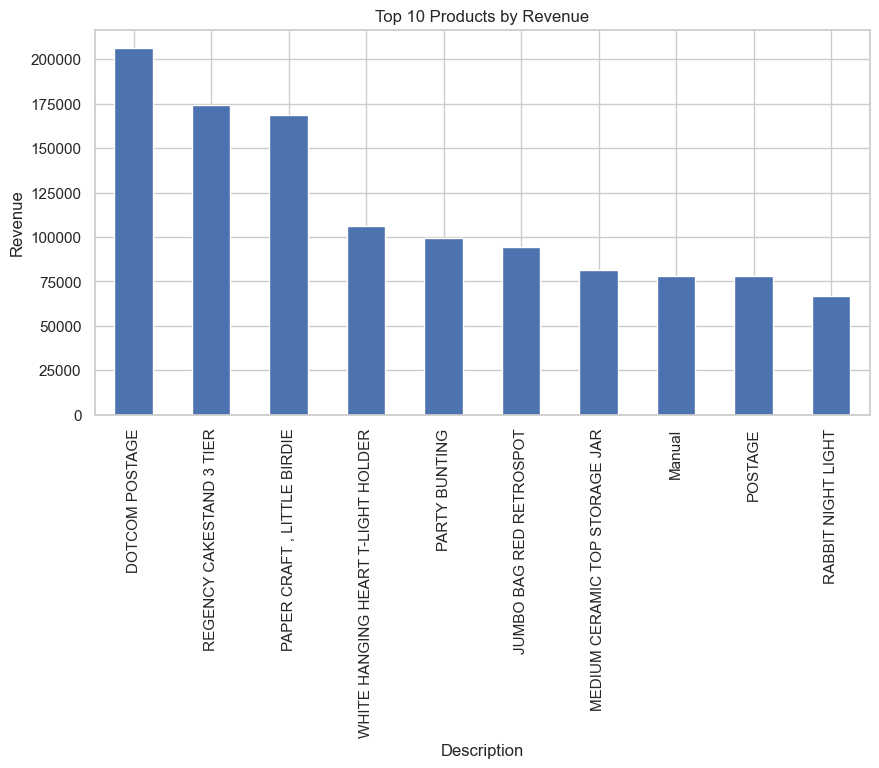

In [23]:
top_products = (
    df.groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.show()

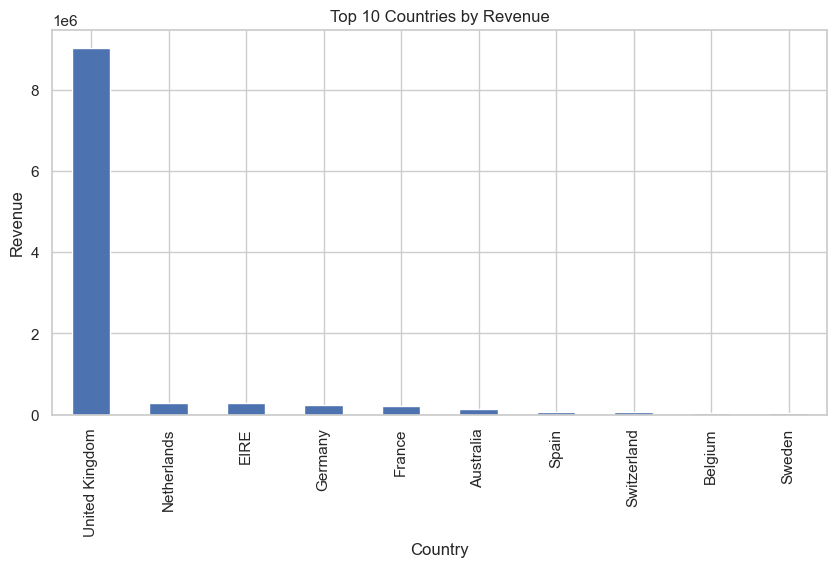

In [25]:
country_sales = (
    df.groupby('Country')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
country_sales.plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.show()

In [27]:
top_customers = (
    df[df['CustomerID'] !=0]
    .groupby('CustomerID')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: Revenue, dtype: float64

## Dashboard Summary

This dashboard provides a high-level overview of the business’s sales
performance, highlighting key revenue trends, top-performing products,
and regional contributions.

The insights generated can be used by business stakeholders to:
- Make data-driven inventory decisions
- Plan targeted marketing campaigns
- Identify high-value customers and regions


## Key Business Insights

1. Revenue shows strong seasonal patterns with peaks toward the end of the year,
   indicating higher demand during festive periods.

2. A small group of products contributes a large share of total revenue,
   suggesting a Pareto (80/20) effect.

3. The UK dominates overall revenue, but several international markets
   show strong growth potential.

4. High-value customers generate a significant portion of sales,
   making them ideal targets for loyalty programs.

## Business Recommendations

- Focus marketing and inventory planning on top-performing products.
- Introduce customer loyalty or membership programs for high-value customers.
- Expand logistics and promotions in high-performing non-UK regions.
- Plan seasonal campaigns to maximize revenue during peak months.
